In [17]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import seaborn as sns

# File path, time column name, and GIC column name
file_paths = ['C:\\Users\\19606\\Desktop\\GMDandGIC\\GICdata\\2023E03_10211.csv', 'C:\\Users\\19606\\Desktop\\GMDandGIC\\GICdata\\2023E03_10212.csv', 'C:\\Users\\19606\\Desktop\\GMDandGIC\\GICdata\\2023E03_10358.csv']
time_column = 'SampleDateTime'
gic_column = 'GICMeasured'  
latitudes = [34.3, 36, 35.9]  # Latitude of the corresponding file (monitor)

# A list of stores for resampled data
resampled_data = []

# Extract the time and determine the common time point
for file_path, latitude in zip(file_paths, latitudes):
    df = pd.read_csv(file_path, usecols=[time_column, gic_column])
    df[time_column] = pd.to_datetime(df[time_column])

    # Set the datetime object as an index
    df.set_index(time_column, inplace=True)
    # Stores resampling data for each file
    resampled_data.append(df.resample('T').mean().interpolate(method='spline', order=3))  # 'T' stands for every minute

resampled_data

[                     GICMeasured
 SampleDateTime                  
 2023-04-23 00:00:00     0.000000
 2023-04-23 00:01:00     0.000000
 2023-04-23 00:02:00     0.000000
 2023-04-23 00:03:00     0.000000
 2023-04-23 00:04:00     0.000000
 ...                          ...
 2023-04-24 23:55:00     0.021667
 2023-04-24 23:56:00    -0.100000
 2023-04-24 23:57:00    -0.118333
 2023-04-24 23:58:00    -0.108333
 2023-04-24 23:59:00    -0.100000
 
 [2880 rows x 1 columns],
                      GICMeasured
 SampleDateTime                  
 2023-04-23 00:00:00   -12.310000
 2023-04-23 00:01:00   -12.001667
 2023-04-23 00:02:00   -12.776667
 2023-04-23 00:03:00   -12.081667
 2023-04-23 00:04:00   -12.838333
 ...                          ...
 2023-04-24 23:55:00    19.198333
 2023-04-24 23:56:00    17.775000
 2023-04-24 23:57:00    18.331667
 2023-04-24 23:58:00    19.801667
 2023-04-24 23:59:00    19.700000
 
 [2880 rows x 1 columns],
                      GICMeasured
 SampleDateTime           

In [33]:
detail_coeffs_list = []
for i in range(len(file_paths)):
    data = resampled_data[i]
    coeffs = pywt.wavedec(data[gic_column], 'haar', level=2)
    detail_coeffs_list.append(coeffs[1])

detail_coeffs_list

[array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [34]:
coefficients_matrix = np.array(detail_coeffs_list)
coefficients_matrix

array([[ 0.        ,  0.        ,  0.        , ..., -0.01583333,
         0.04166667, -0.005     ],
       [ 0.27333333,  0.6925    ,  0.34      , ...,  0.09083333,
         1.28583333, -1.6975    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
resampled_data[0].index
original_index = resampled_data[0].index

# 从原始索引中每四个取一个来创建新索引
new_index = original_index[::4]

# 如果您需要将这个新索引转换为字符串格式
new_time_str = new_index.strftime('%Y-%m-%d %H:%M:%S').tolist()

In [36]:
df_gic = pd.DataFrame(index=new_time_str)

# 填充 DataFrame
for i, lat in enumerate(latitudes):
    df_gic[lat] = coefficients_matrix[i]


# 转置 DataFrame
df_transposed = df_gic.transpose()

df_transposed.index.name = 'Latitude'
df_transposed.columns.name = 'Time'
print(df_transposed.head())

Time      2023-04-23 00:00:00  2023-04-23 00:04:00  2023-04-23 00:08:00  \
Latitude                                                                  
34.3                 0.000000               0.0000                 0.00   
36.0                 0.273333               0.6925                 0.34   
35.9                 0.000000               0.0000                 0.00   

Time      2023-04-23 00:12:00  2023-04-23 00:16:00  2023-04-23 00:20:00  \
Latitude                                                                  
34.3                 0.000000             0.000000               0.0000   
36.0                 0.253333            -0.531667              -0.4725   
35.9                 0.000000             0.000000               0.0000   

Time      2023-04-23 00:24:00  2023-04-23 00:28:00  2023-04-23 00:32:00  \
Latitude                                                                  
34.3                 0.000000             0.000000             0.000000   
36.0                -0.

In [41]:
from matplotlib.colors import LinearSegmentedColormap

# 创建颜色字典
cmap_dict = {
    'red':   ((0.0, 0.0, 0.0),   # Black
              (0.7, 1.0, 1.0),   # White
              (1.0, 1.0, 0.0)),  # Red

    'green': ((0.0, 0.0, 0.0),   # Black
              (0.7, 1.0, 1.0),   # White
              (1.0, 0.0, 0.0)),  # Red

    'blue':  ((0.0, 0.0, 0.0),   # Black
              (0.7, 1.0, 1.0),   # White
              (1.0, 0.0, 0.0))   # Red
}

# 创建 LinearSegmentedColormap 对象
custom_cmap = LinearSegmentedColormap('custom_cmap', cmap_dict)


<AxesSubplot:xlabel='Time', ylabel='Latitude'>

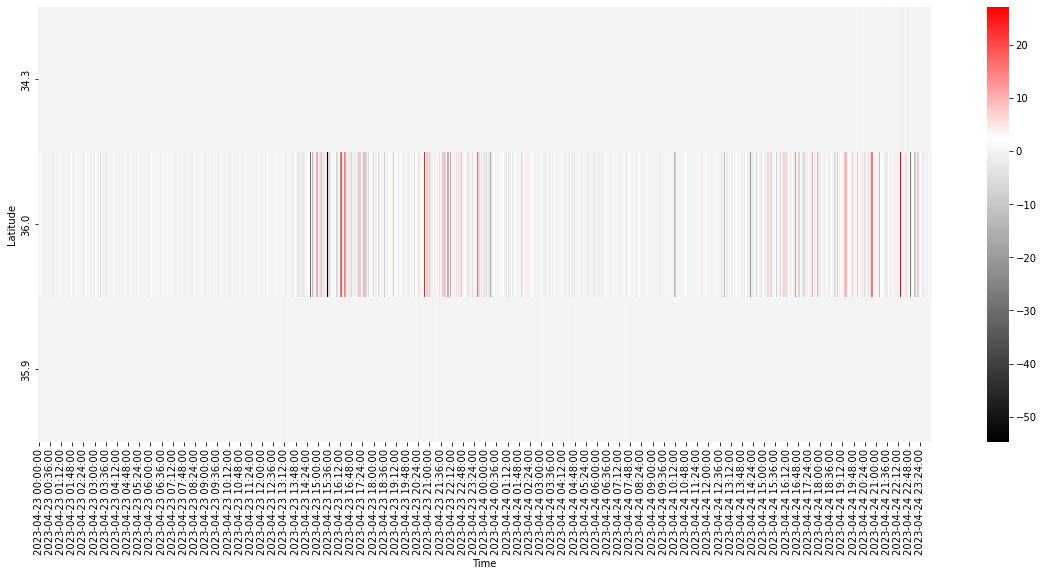

In [42]:
sns.set_context({"figure.figsize":(20,8)})
sns.heatmap(data=df_transposed,cmap=custom_cmap) 